In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect


In [4]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///Resouces/hawaii.sqlite")
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# test using demographics data then erase
engine2 = create_engine("sqlite:///Resources/demographics.sqlite")
# reflect an existing database into a new model
Base2 = automap_base()

# reflect the tables
Base2.prepare(engine2, reflect=True)

# Create the inspector and connect it to the engine
inspector2 = inspect(engine2)

# Collect the names of tables within the database
inspector2.get_table_names()


[]

In [6]:
# test using demographics data
# Using the inspector to print the column names within the 'Salaries' table and its types
columns = inspector2.get_columns('demographics')
for column in columns:
    print(column["name"], column["type"])
    

In [7]:
# test using demographics data
# reflect an existing database into a new model
Base2 = automap_base()

# reflect the tables
Base2.prepare(engine2, reflect=True)

# Print all of the classes mapped to the Base
print(Base2.classes.keys())

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
print('tables inside of our hawaii.sqlite')
print(inspector.get_table_names())
print('')

# let's see what's in those tables
print(' -- columns inside of measurement table')
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
print('')
    
print(' -- columns inside of station table')
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])    


[]
tables inside of our hawaii.sqlite
['measurement', 'station']

 -- columns inside of measurement table
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

 -- columns inside of station table
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [9]:
# View all of the classes that automap found
Base.classes.keys()



['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

print(' -- Let\'s see what we have we have in our measurement table' )
print(session.query(Measurement).statement)
print('')

print(' -- Now let\'s see what we have for dates')
dates = session.query(Measurement) 
for date in dates:
    print(date.date)
    

 -- Let's see what we have we have in our measurement table
SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs 
FROM measurement

 -- Now let's see what we have for dates
2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
20

2013-12-17
2013-12-18
2013-12-19
2013-12-20
2013-12-21
2013-12-22
2013-12-23
2013-12-24
2013-12-25
2013-12-26
2013-12-27
2013-12-28
2013-12-29
2013-12-30
2013-12-31
2014-01-01
2014-01-02
2014-01-03
2014-01-04
2014-01-05
2014-01-06
2014-01-07
2014-01-08
2014-01-09
2014-01-10
2014-01-11
2014-01-12
2014-01-13
2014-01-14
2014-01-15
2014-01-16
2014-01-17
2014-01-18
2014-01-19
2014-01-20
2014-01-21
2014-01-22
2014-01-23
2014-01-24
2014-01-25
2014-01-26
2014-01-27
2014-01-28
2014-01-29
2014-01-30
2014-01-31
2014-02-01
2014-02-02
2014-02-03
2014-02-04
2014-02-05
2014-02-06
2014-02-07
2014-02-08
2014-02-09
2014-02-10
2014-02-11
2014-02-12
2014-02-13
2014-02-14
2014-02-15
2014-02-16
2014-02-17
2014-02-18
2014-02-19
2014-02-20
2014-02-21
2014-02-22
2014-02-23
2014-02-24
2014-02-25
2014-02-26
2014-02-27
2014-02-28
2014-03-01
2014-03-02
2014-03-03
2014-03-04
2014-03-05
2014-03-06
2014-03-07
2014-03-08
2014-03-09
2014-03-10
2014-03-11
2014-03-12
2014-03-13
2014-03-14
2014-03-15
2014-03-16
2014-03-17

2016-12-24
2016-12-25
2016-12-26
2016-12-27
2016-12-28
2016-12-29
2016-12-30
2016-12-31
2017-01-01
2017-01-02
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-01-07
2017-01-08
2017-01-09
2017-01-10
2017-01-11
2017-01-12
2017-01-13
2017-01-14
2017-01-15
2017-01-16
2017-01-17
2017-01-18
2017-01-19
2017-01-20
2017-01-21
2017-01-22
2017-01-23
2017-01-24
2017-01-25
2017-01-26
2017-01-27
2017-01-28
2017-01-29
2017-01-30
2017-01-31
2017-02-01
2017-02-02
2017-02-03
2017-02-04
2017-02-05
2017-02-06
2017-02-07
2017-02-08
2017-02-09
2017-02-10
2017-02-11
2017-02-12
2017-02-13
2017-02-14
2017-02-15
2017-02-16
2017-02-17
2017-02-18
2017-02-19
2017-02-20
2017-02-21
2017-02-22
2017-02-23
2017-02-24
2017-02-25
2017-02-26
2017-02-27
2017-02-28
2017-03-01
2017-03-02
2017-03-03
2017-03-04
2017-03-05
2017-03-06
2017-03-07
2017-03-08
2017-03-09
2017-03-10
2017-03-11
2017-03-12
2017-03-13
2017-03-14
2017-03-15
2017-03-16
2017-03-17
2017-03-18
2017-03-19
2017-03-20
2017-03-21
2017-03-22
2017-03-23
2017-03-24

2013-03-30
2013-03-31
2013-04-01
2013-04-02
2013-04-03
2013-04-04
2013-04-05
2013-04-06
2013-04-07
2013-04-08
2013-04-09
2013-04-10
2013-04-11
2013-04-12
2013-04-13
2013-04-14
2013-04-15
2013-04-16
2013-04-17
2013-04-18
2013-04-19
2013-04-20
2013-04-21
2013-04-22
2013-04-23
2013-04-24
2013-04-25
2013-04-26
2013-04-27
2013-04-28
2013-04-29
2013-04-30
2013-05-01
2013-05-02
2013-05-03
2013-05-04
2013-05-05
2013-05-06
2013-05-07
2013-05-08
2013-05-09
2013-05-10
2013-05-11
2013-05-12
2013-05-13
2013-05-14
2013-05-15
2013-05-16
2013-05-17
2013-05-18
2013-05-19
2013-05-20
2013-05-21
2013-05-22
2013-05-23
2013-05-24
2013-05-25
2013-05-26
2013-05-27
2013-05-28
2013-05-29
2013-05-30
2013-05-31
2013-06-01
2013-06-02
2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26
2013-06-27
2013-06-28

2017-06-13
2017-06-14
2017-06-15
2017-06-16
2017-06-17
2017-06-18
2017-06-19
2017-06-20
2017-06-21
2017-06-22
2017-06-23
2017-06-24
2017-06-25
2017-06-26
2017-06-27
2017-06-28
2017-06-29
2017-06-30
2017-07-01
2017-07-02
2017-07-03
2017-07-04
2017-07-05
2017-07-06
2017-07-07
2017-07-08
2017-07-09
2017-07-10
2017-07-11
2017-07-12
2017-07-13
2017-07-14
2017-07-15
2017-07-16
2017-07-17
2017-07-18
2017-07-19
2017-07-20
2017-07-21
2017-07-22
2017-07-23
2017-07-24
2017-07-25
2017-07-26
2017-07-27
2017-07-28
2017-07-29
2017-07-30
2017-07-31
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-08
2010-03-09
2010-03-10
2010-03-11
2010-03-12
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-19
2010-03-20
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-25
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-04
2010-04-05
2010-04-06
2010-04-07
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-14
2010-04-15

2015-03-19
2015-03-20
2015-03-22
2015-03-23
2015-03-24
2015-03-25
2015-03-26
2015-03-29
2015-03-30
2015-03-31
2015-04-01
2015-04-02
2015-04-03
2015-04-05
2015-04-06
2015-04-07
2015-04-08
2015-04-09
2015-04-10
2015-04-11
2015-04-12
2015-04-13
2015-04-14
2015-04-15
2015-04-16
2015-04-17
2015-04-19
2015-04-20
2015-04-22
2015-04-23
2015-04-24
2015-04-25
2015-04-26
2015-04-27
2015-04-28
2015-04-29
2015-04-30
2015-05-01
2015-05-03
2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-09
2015-05-10
2015-05-11
2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18
2015-05-19
2015-05-20
2015-05-21
2015-05-22
2015-05-23
2015-05-24
2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30
2015-06-01
2015-06-03
2015-06-04
2015-06-05
2015-06-06
2015-06-08
2015-06-09
2015-06-10
2015-06-11
2015-06-12
2015-06-14
2015-06-15
2015-06-16
2015-06-17
2015-06-18
2015-06-19
2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25
2015-06-26
2015-06-27
2015-06-28

2014-04-15
2014-04-16
2014-04-17
2014-04-21
2014-04-22
2014-04-23
2014-04-24
2014-04-28
2014-04-29
2014-05-02
2014-05-05
2014-05-06
2014-05-07
2014-05-08
2014-05-09
2014-05-12
2014-05-13
2014-05-14
2014-05-15
2014-05-16
2014-05-19
2014-05-20
2014-05-21
2014-05-22
2014-05-23
2014-05-27
2014-05-28
2014-05-29
2014-06-02
2014-06-03
2014-06-04
2014-06-05
2014-06-06
2014-06-09
2014-06-10
2014-06-12
2014-06-13
2014-06-16
2014-06-17
2014-06-18
2014-06-19
2014-06-20
2014-06-27
2014-07-03
2014-07-07
2014-07-08
2014-07-09
2014-07-10
2014-07-11
2014-07-14
2014-07-15
2014-07-16
2014-07-17
2014-07-18
2014-07-21
2014-07-22
2014-07-23
2014-07-24
2014-07-25
2014-07-28
2014-07-29
2014-07-30
2014-07-31
2014-08-11
2014-08-12
2014-08-13
2014-08-14
2014-08-18
2014-08-19
2014-08-20
2014-08-21
2014-08-22
2014-08-25
2014-08-26
2014-08-27
2014-09-02
2014-09-03
2014-09-04
2014-09-05
2014-09-08
2014-09-09
2014-09-10
2014-09-11
2014-09-12
2014-09-15
2014-09-16
2014-09-17
2014-09-18
2014-09-19
2014-09-22
2014-09-23

2011-01-04
2011-01-05
2011-01-06
2011-01-07
2011-01-08
2011-01-09
2011-01-10
2011-01-11
2011-01-12
2011-01-13
2011-01-14
2011-01-15
2011-01-16
2011-01-17
2011-01-18
2011-01-19
2011-01-20
2011-01-21
2011-01-22
2011-01-23
2011-01-24
2011-01-25
2011-01-26
2011-01-27
2011-01-28
2011-01-29
2011-01-30
2011-01-31
2011-02-01
2011-02-02
2011-02-03
2011-02-04
2011-02-05
2011-02-06
2011-02-07
2011-02-08
2011-02-09
2011-02-10
2011-02-11
2011-02-12
2011-02-13
2011-02-15
2011-02-16
2011-02-17
2011-02-18
2011-02-19
2011-02-20
2011-02-21
2011-02-22
2011-02-23
2011-02-24
2011-02-25
2011-02-26
2011-02-27
2011-02-28
2011-03-01
2011-03-02
2011-03-03
2011-03-04
2011-03-05
2011-03-06
2011-03-07
2011-03-08
2011-03-09
2011-03-10
2011-03-11
2011-03-12
2011-03-13
2011-03-14
2011-03-15
2011-03-16
2011-03-17
2011-03-18
2011-03-19
2011-03-20
2011-03-21
2011-03-22
2011-03-23
2011-03-24
2011-03-25
2011-03-26
2011-03-27
2011-03-29
2011-03-30
2011-03-31
2011-04-01
2011-04-02
2011-04-03
2011-04-04
2011-04-05
2011-04-06

2015-04-06
2015-04-07
2015-04-08
2015-04-09
2015-04-11
2015-04-12
2015-04-13
2015-04-14
2015-04-15
2015-04-16
2015-04-17
2015-04-18
2015-04-19
2015-04-20
2015-04-21
2015-04-22
2015-04-23
2015-04-24
2015-04-25
2015-04-26
2015-04-27
2015-04-29
2015-04-30
2015-05-01
2015-05-02
2015-05-03
2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-09
2015-05-10
2015-05-11
2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18
2015-05-19
2015-05-20
2015-05-21
2015-05-22
2015-05-23
2015-05-24
2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30
2015-05-31
2015-06-01
2015-06-02
2015-06-03
2015-06-04
2015-06-05
2015-06-06
2015-06-07
2015-06-08
2015-06-09
2015-06-10
2015-06-11
2015-06-12
2015-06-13
2015-06-14
2015-06-15
2015-06-16
2015-06-17
2015-06-18
2015-06-19
2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25
2015-06-26
2015-06-27
2015-06-29
2015-06-30
2015-07-01
2015-07-02
2015-07-06
2015-07-07
2015-07-08
2015-07-09
2015-07-10
2015-07-11

2011-12-02
2011-12-03
2011-12-04
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-10
2011-12-11
2011-12-12
2011-12-13
2011-12-14
2011-12-15
2011-12-16
2011-12-17
2011-12-18
2011-12-19
2011-12-20
2011-12-21
2011-12-22
2011-12-23
2011-12-24
2011-12-25
2011-12-26
2011-12-27
2011-12-28
2011-12-29
2011-12-30
2011-12-31
2012-01-01
2012-01-02
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-07
2012-01-08
2012-01-09
2012-01-10
2012-01-11
2012-01-12
2012-01-13
2012-01-14
2012-01-15
2012-01-16
2012-01-17
2012-01-18
2012-01-19
2012-01-20
2012-01-21
2012-01-22
2012-01-23
2012-01-24
2012-01-25
2012-01-26
2012-01-27
2012-01-28
2012-01-29
2012-01-30
2012-01-31
2012-02-01
2012-02-02
2012-02-03
2012-02-04
2012-02-05
2012-02-06
2012-02-07
2012-02-08
2012-02-09
2012-02-10
2012-02-11
2012-02-12
2012-02-13
2012-02-14
2012-02-15
2012-02-16
2012-02-17
2012-02-18
2012-02-19
2012-02-20
2012-02-21
2012-02-22
2012-02-23
2012-02-24
2012-02-25
2012-02-26
2012-02-27
2012-02-28
2012-02-29
2012-03-01

2016-01-10
2016-01-11
2016-01-12
2016-01-13
2016-01-14
2016-01-15
2016-01-16
2016-01-17
2016-01-18
2016-01-19
2016-01-20
2016-01-21
2016-01-22
2016-01-23
2016-01-24
2016-01-25
2016-01-26
2016-01-27
2016-01-28
2016-01-29
2016-01-30
2016-01-31
2016-02-01
2016-02-02
2016-02-03
2016-02-04
2016-02-05
2016-02-06
2016-02-07
2016-02-08
2016-02-09
2016-02-10
2016-02-11
2016-02-12
2016-02-13
2016-02-14
2016-02-15
2016-02-16
2016-02-17
2016-02-18
2016-02-19
2016-02-20
2016-02-21
2016-02-22
2016-02-23
2016-02-24
2016-02-25
2016-02-26
2016-02-27
2016-02-28
2016-02-29
2016-03-01
2016-03-02
2016-03-03
2016-03-04
2016-03-05
2016-03-06
2016-03-07
2016-03-08
2016-03-09
2016-03-10
2016-03-11
2016-03-12
2016-03-13
2016-03-14
2016-03-15
2016-03-16
2016-03-17
2016-03-18
2016-03-19
2016-03-20
2016-03-21
2016-03-22
2016-03-23
2016-03-24
2016-03-25
2016-03-26
2016-03-27
2016-03-28
2016-03-29
2016-03-30
2016-03-31
2016-04-01
2016-04-02
2016-04-03
2016-04-04
2016-04-05
2016-04-06
2016-04-07
2016-04-08
2016-04-09

2012-03-23
2012-03-24
2012-03-25
2012-03-26
2012-03-27
2012-03-28
2012-03-29
2012-03-30
2012-03-31
2012-04-01
2012-04-02
2012-04-03
2012-04-04
2012-04-05
2012-04-06
2012-04-07
2012-04-08
2012-04-09
2012-04-10
2012-04-11
2012-04-12
2012-04-13
2012-04-14
2012-04-15
2012-04-16
2012-04-17
2012-04-18
2012-04-19
2012-04-20
2012-04-21
2012-04-22
2012-04-23
2012-04-24
2012-04-25
2012-04-26
2012-04-27
2012-04-28
2012-04-29
2012-04-30
2012-05-01
2012-05-02
2012-05-03
2012-05-04
2012-05-05
2012-05-06
2012-05-07
2012-05-08
2012-05-09
2012-05-10
2012-05-11
2012-05-12
2012-05-13
2012-05-14
2012-05-15
2012-05-16
2012-05-17
2012-05-18
2012-05-19
2012-05-20
2012-05-21
2012-05-22
2012-05-23
2012-05-24
2012-05-25
2012-05-26
2012-05-27
2012-05-28
2012-05-29
2012-05-30
2012-05-31
2012-06-01
2012-06-02
2012-06-03
2012-06-04
2012-06-05
2012-06-06
2012-06-07
2012-06-08
2012-06-09
2012-06-10
2012-06-11
2012-06-12
2012-06-13
2012-06-14
2012-06-16
2012-06-17
2012-06-18
2012-06-19
2012-06-20
2012-06-21
2012-06-22

2015-07-09
2015-07-10
2015-07-13
2015-07-14
2015-07-15
2015-07-16
2015-07-17
2015-07-21
2015-07-22
2015-07-23
2015-07-24
2015-07-27
2015-07-28
2015-07-30
2015-07-31
2015-08-03
2015-08-04
2015-08-05
2015-08-06
2015-08-13
2015-08-14
2015-08-17
2015-08-19
2015-08-20
2015-08-24
2015-08-25
2015-08-26
2015-08-27
2015-08-28
2015-08-30
2015-09-01
2015-09-02
2015-09-03
2015-09-04
2015-09-14
2015-09-17
2015-09-18
2015-09-21
2015-09-22
2015-09-23
2015-09-24
2015-09-25
2015-10-08
2015-10-09
2015-10-12
2015-10-13
2015-10-14
2015-10-15
2015-10-16
2015-10-19
2015-10-20
2015-10-21
2015-10-22
2015-10-25
2015-10-26
2015-10-28
2015-10-29
2015-10-30
2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-05
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-13
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-29
2010-01-30
2010-01-31
2010-02-01
2010-02-02

2014-03-07
2014-03-08
2014-03-09
2014-03-10
2014-03-11
2014-03-12
2014-03-13
2014-03-15
2014-03-16
2014-03-23
2014-03-25
2014-03-26
2014-03-27
2014-03-28
2014-03-29
2014-03-31
2014-04-01
2014-04-02
2014-04-03
2014-04-04
2014-04-05
2014-04-06
2014-04-07
2014-04-08
2014-04-09
2014-04-10
2014-04-11
2014-04-12
2014-04-13
2014-04-14
2014-04-15
2014-04-16
2014-04-17
2014-04-18
2014-04-19
2014-04-20
2014-04-21
2014-04-22
2014-04-23
2014-04-24
2014-04-25
2014-04-26
2014-04-27
2014-04-28
2014-04-29
2014-04-30
2014-05-01
2014-05-02
2014-05-03
2014-05-04
2014-05-05
2014-05-06
2014-05-07
2014-05-08
2014-05-09
2014-05-11
2014-05-12
2014-05-13
2014-05-14
2014-05-15
2014-05-16
2014-05-17
2014-05-18
2014-05-19
2014-05-20
2014-05-21
2014-05-22
2014-05-23
2014-05-24
2014-05-25
2014-05-26
2014-05-27
2014-05-28
2014-05-29
2014-05-30
2014-06-01
2014-06-02
2014-06-03
2014-06-04
2014-06-05
2014-06-06
2014-06-07
2014-06-08
2014-06-09
2014-06-10
2014-06-11
2014-06-12
2014-06-13
2014-06-14
2014-06-15
2014-06-16

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs 
#FROM measurement where measurement.date > '2016-08-31'

print(' -- our last date in measurement')
last_date = pd.read_sql_query("SELECT MAX(date) FROM measurement", engine)
print(last_date)

# Calculate the date one year from the last date in data set.

#select date from measurement where date like '2017-%' or '2016-%'
print(' -- get twelve months')
twelve_months = pd.read_sql_query("select distinct date from measurement where (date like '2017%')\
                                  or (date like '2016-09%')\
                                  or (date like '2016-10%')\
                                  or (date like '2016-11%')\
                                  or (date like '2016-12%')", engine)
print(twelve_months)
print('')


# Perform a query to retrieve the data and precipitation scores
print(' -- get twelve months with precipitation data')
twelve_months = pd.read_sql_query("select date, prcp from measurement where (date like '2017%')\
                                  or (date like '2016-09%')\
                                  or (date like '2016-10%')\
                                  or (date like '2016-11%')\
                                  or (date like '2016-12%')", engine)
print(twelve_months)
print('')
# group by date and average prcp

print(' -- drop rows with null values')
twelve_months.dropna(axis = 0, how = 'any', inplace=True)
print(twelve_months)
print('')
# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date




 -- our last date in measurement
    MAX(date)
0  2017-08-23
 -- get twelve months
           date
0    2016-09-01
1    2016-09-02
2    2016-09-03
3    2016-09-04
4    2016-09-05
..          ...
352  2017-05-09
353  2017-05-26
354  2017-07-19
355  2017-08-16
356  2017-08-17

[357 rows x 1 columns]

 -- get twelve months with precipitation data
            date  prcp
0     2016-09-01  0.00
1     2016-09-02  0.00
2     2016-09-03  0.00
3     2016-09-04  0.03
4     2016-09-05   NaN
...          ...   ...
2166  2017-08-19  0.09
2167  2017-08-20   NaN
2168  2017-08-21  0.56
2169  2017-08-22  0.50
2170  2017-08-23  0.45

[2171 rows x 2 columns]

 -- drop rows with null values
            date  prcp
0     2016-09-01  0.00
1     2016-09-02  0.00
2     2016-09-03  0.00
3     2016-09-04  0.03
6     2016-09-07  0.05
...          ...   ...
2164  2017-08-17  0.13
2166  2017-08-19  0.09
2168  2017-08-21  0.56
2169  2017-08-22  0.50
2170  2017-08-23  0.45

[1968 rows x 2 columns]



------
  Something we've learned by looking at this data is there must 
  be multiple measurements for individual dates, because otherwise we
  would have no more than 365 rows of data, not the 1332 reported above.
  So now what, Data Fans?
  We could just ditch all but the first row of any duplicates, which seems rude.
  We don't know why we have duplicate readings and maybe there is a good reason for
  for multiples, so we are going to group by date and then average the precipitation
  data when there is multiple readings and call it good.
------

 --> precip_avg_df --> 357 rows.  less than 365 because we dropped nulls
           date      prcp         day
0    2016-09-01  0.006000  2016-09-01
1    2016-09-02  0.050000  2016-09-02
2    2016-09-03  0.254000  2016-09-03
3    2016-09-04  0.276000  2016-09-04
4    2016-09-05  0.085000  2016-09-05
..          ...       ...         ...
352  2017-08-19  0.030000  2017-08-19
353  2017-08-20  0.005000  2017-08-20
354  2017-08-21  0.193333  20

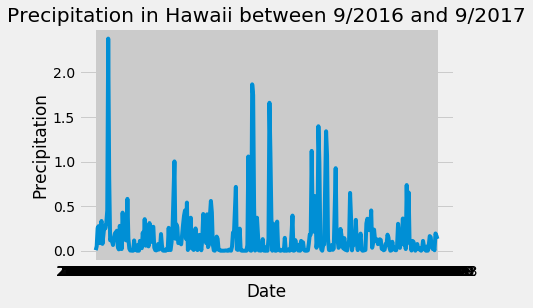

In [14]:
print('------')
print('  Something we\'ve learned by looking at this data is there must ')
print('  be multiple measurements for individual dates, because otherwise we')
print('  would have no more than 365 rows of data, not the 1332 reported above.')
print('  So now what, Data Fans?')
print('  We could just ditch all but the first row of any duplicates, which seems rude.')
print('  We don\'t know why we have duplicate readings and maybe there is a good reason for')
print('  for multiples, so we are going to group by date and then average the precipitation')
print('  data when there is multiple readings and call it the best we can get.')
print('------')
print('')

print(' --> precip_avg_df --> 357 rows.  less than 365 because we dropped nulls')
precip_avg = twelve_months.groupby(['date'])['prcp'].mean()
precip_avg_df = pd.DataFrame(precip_avg)
precip_avg_df['day'] = precip_avg_df.index 
precip_avg_df.reset_index(inplace = True)
print(precip_avg_df)
#print(precip_avg_df.day)
#print(precip_avg_df.prcp)

plt.plot(precip_avg_df['day'], precip_avg_df['prcp'])
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title('Precipitation in Hawaii between 9/2016 and 9/2017')
plt.show()

In [17]:
print(' -- That is too hard to read, how about we group the data by month')
print(' -- and graph that')
print('    first we split our date string so we can see the month:')

split_data = precip_avg_df['day'].str.split("-")
data = split_data.to_list()
names = ['year', 'month', 'day']
new_df = pd.DataFrame(data, columns=names)
print(' -- new_df')
print(new_df)

print(' -- then we merge our new split date columns with our precipitation readings')
new_df = new_df.merge(precip_avg_df, left_index=True, right_index=True)
print('')
print(' -- new_df now after merge')
print('')
print(new_df)
print('')
# write to csv just to check
#new_df.to_csv (r'new_df_dataframe2.csv', header=True)

print(' -- group by month, and then sum = months_sum')
print('')
months_sum = new_df.groupby(['month'])['prcp'].sum()
print(months_sum)

#months_sum.to_frame()
months_sum = pd.DataFrame(months_sum)
print('')
print(months_sum)
print(' -- and months_sum is now type...')
print(type(months_sum))



 -- That is too hard to read, how about we group the data by month
 -- and graph that
    first we split our date string so we can see the month:
 -- new_df
     year month day
0    2016    09  01
1    2016    09  02
2    2016    09  03
3    2016    09  04
4    2016    09  05
..    ...   ...  ..
352  2017    08  19
353  2017    08  20
354  2017    08  21
355  2017    08  22
356  2017    08  23

[357 rows x 3 columns]
 -- then we merge our new split date columns with our precipitation readings

 -- new_df now after merge

     year month day_x        date      prcp       day_y
0    2016    09    01  2016-09-01  0.006000  2016-09-01
1    2016    09    02  2016-09-02  0.050000  2016-09-02
2    2016    09    03  2016-09-03  0.254000  2016-09-03
3    2016    09    04  2016-09-04  0.276000  2016-09-04
4    2016    09    05  2016-09-05  0.085000  2016-09-05
..    ...   ...   ...         ...       ...         ...
352  2017    08    19  2017-08-19  0.030000  2017-08-19
353  2017    08    20  20

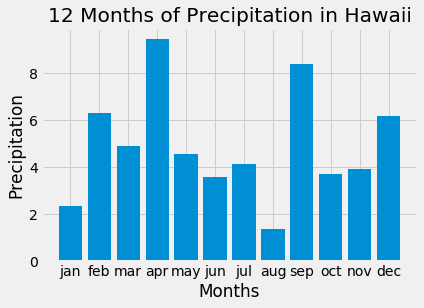


For this date range the driest months are August and January.


In [18]:
# now we draw our graph
months = ['jan', 'feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
plt.bar(months, months_sum['prcp'])
plt.xlabel("Months")
plt.ylabel("Precipitation")
plt.title('12 Months of Precipitation in Hawaii')
plt.show()
print('')
print('For this date range the driest months are August and January.')

In [19]:
print('this cell intentionally left blank')


this cell intentionally left blank


In [20]:
print('this cell intentionally left blank')



this cell intentionally left blank


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print('')
print(' -- Let us see what the precipitation data has to say, using our averaged data as described above')
print('')
precip_avg_df['prcp'].describe()


 -- Let us see what the precipitation data has to say, using our averaged data as described above



count    357.000000
mean       0.165056
std        0.287835
min        0.000000
25%        0.008333
50%        0.070000
75%        0.188000
max        2.380000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
print(' -- Let\'s see what we have we get when we check on our session query' )
print(session.query(Station).statement)
print('')

print(' -- let us peek into our station class')
station_data = pd.read_sql_query("SELECT * FROM station", engine)
print(station_data)
print('')
print(station_data['id'].count())

#select count(distinct station) from station

station_count = pd.read_sql_query("select count(distinct station) from station", engine)
print(station_count)
print('')

unique_stations= pd.read_sql_query("select distinct station from station", engine)
print(f"unique stations:")
print(unique_stations)
print('')


print(' -- Now let\'s see what we have for stations')
spots = session.query(Station) 
for spot in spots:
    print(spot.name)

 -- Let's see what we have we get when we check on our session query
SELECT station.id, station.station, station.name, station.latitude, station.longitude, station.elevation 
FROM station

 -- let us peek into our station class
   id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US  21.27160   
1   2  USC00513117                    KANEOHE 838.1, HI US  21.42340   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130   
3   4  USC00517948                       PEARL CITY, HI US  21.39340   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920   
5   6  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556   
6   7  USC00519281                     WAIHEE 837.5, HI US  21.45167   
7   8  USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520   
8   9  USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310   

   longitude  elevation  
0 -157.81680        3.0  

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

print('Show our most active stations and how many observations they have:')
station_count = pd.read_sql_query("SELECT station,COUNT(*) as count from measurement\
    GROUP BY station ORDER BY count DESC;", engine)
print(station_count)
print('')

Show our most active stations and how many observations they have:
       station  count
0  USC00519281   2772
1  USC00519397   2724
2  USC00513117   2709
3  USC00519523   2669
4  USC00516128   2612
5  USC00514830   2202
6  USC00511918   1979
7  USC00517948   1372
8  USC00518838    511



In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# -- let's get our data from Measurement
measurement_df = pd.read_sql_query("SELECT * FROM measurement", engine)
#measurement_df

print('')
print(' -- Station WAIHEE, USC00519281 our most active station')
print(' -- Lowest observed temperature is')
lowest = measurement_df['tobs'].min()
#print(f" lowest of all measurements, not just our active station {lowest}")
lowest = measurement_df.groupby(['station'])['tobs'].min()
lowest_df = pd.DataFrame(lowest)
lowest_df.reset_index(inplace = True)
print(lowest_df[lowest_df['station'] == 'USC00519281'])
print('')

#print(' -- min temp at each station ')
#print(lowest_df)
#print(lowest_df[''])

print(' -- Highest observed temperature is')
#highest = measurement_df['tobs'].max()
#print(f" max of all measurements, not just our active station {highest}")
highest = measurement_df.groupby(['station'])['tobs'].max()
highest_df = pd.DataFrame(highest)
highest_df.reset_index(inplace = True)
print(highest_df[highest_df['station'] == 'USC00519281'])
print('')

print(' -- Average observed temperature is')
ave = measurement_df.groupby(['station'])['tobs'].mean()
ave_df = pd.DataFrame(ave)
ave_df.reset_index(inplace = True)
print(ave_df[ave_df['station'] == 'USC00519281'])
print('')





 -- Station WAIHEE, USC00519281 our most active station
 -- Lowest observed temperature is
       station  tobs
6  USC00519281  54.0

 -- Highest observed temperature is
       station  tobs
6  USC00519281  85.0

 -- Average observed temperature is
       station       tobs
6  USC00519281  71.663781



In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Perform a query to retrieve the right dates, right station and tobs
print('')
print(' -- get twelve months with temp data for station USC00519281')
print('')
twelve_months = pd.read_sql_query("select date, tobs, station from measurement where ((date like '2017%')\
                                  or (date like '2016-09%')\
                                  or (date like '2016-10%')\
                                  or (date like '2016-11%')\
                                  or (date like '2016-12%'))\
                                  and (station = 'USC00519281')", engine)
print(twelve_months)
print('')


 -- get twelve months with temp data for station USC00519281

           date  tobs      station
0    2016-09-01  80.0  USC00519281
1    2016-09-02  80.0  USC00519281
2    2016-09-03  78.0  USC00519281
3    2016-09-04  78.0  USC00519281
4    2016-09-05  78.0  USC00519281
..          ...   ...          ...
338  2017-08-14  77.0  USC00519281
339  2017-08-15  77.0  USC00519281
340  2017-08-16  76.0  USC00519281
341  2017-08-17  76.0  USC00519281
342  2017-08-18  79.0  USC00519281

[343 rows x 3 columns]




  --  Station WAIHEE, USC00519281



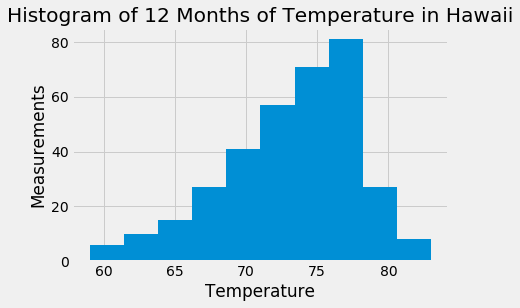

In [32]:
# and now our histogram
print('')
print('  --  Station WAIHEE, USC00519281')
print('')
plt.hist(twelve_months['tobs'])
plt.xlabel("Temperature")
plt.ylabel("Measurements")
plt.title('Histogram of 12 Months of Temperature in Hawaii')
plt.show() 

# Close session

In [33]:
# Close Session
session.close()

